In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:


# Load dataset
df = pd.read_excel("glass.xlsx", sheet_name="glass")


In [3]:
# ====================== STEP 1: EDA ======================

print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nStatistics:\n", df.describe())


Shape: (214, 10)

Data Types:
 RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

Missing Values:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Statistics:
                RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
ma

In [4]:


# ================== STEP 2: Visualizations ==================


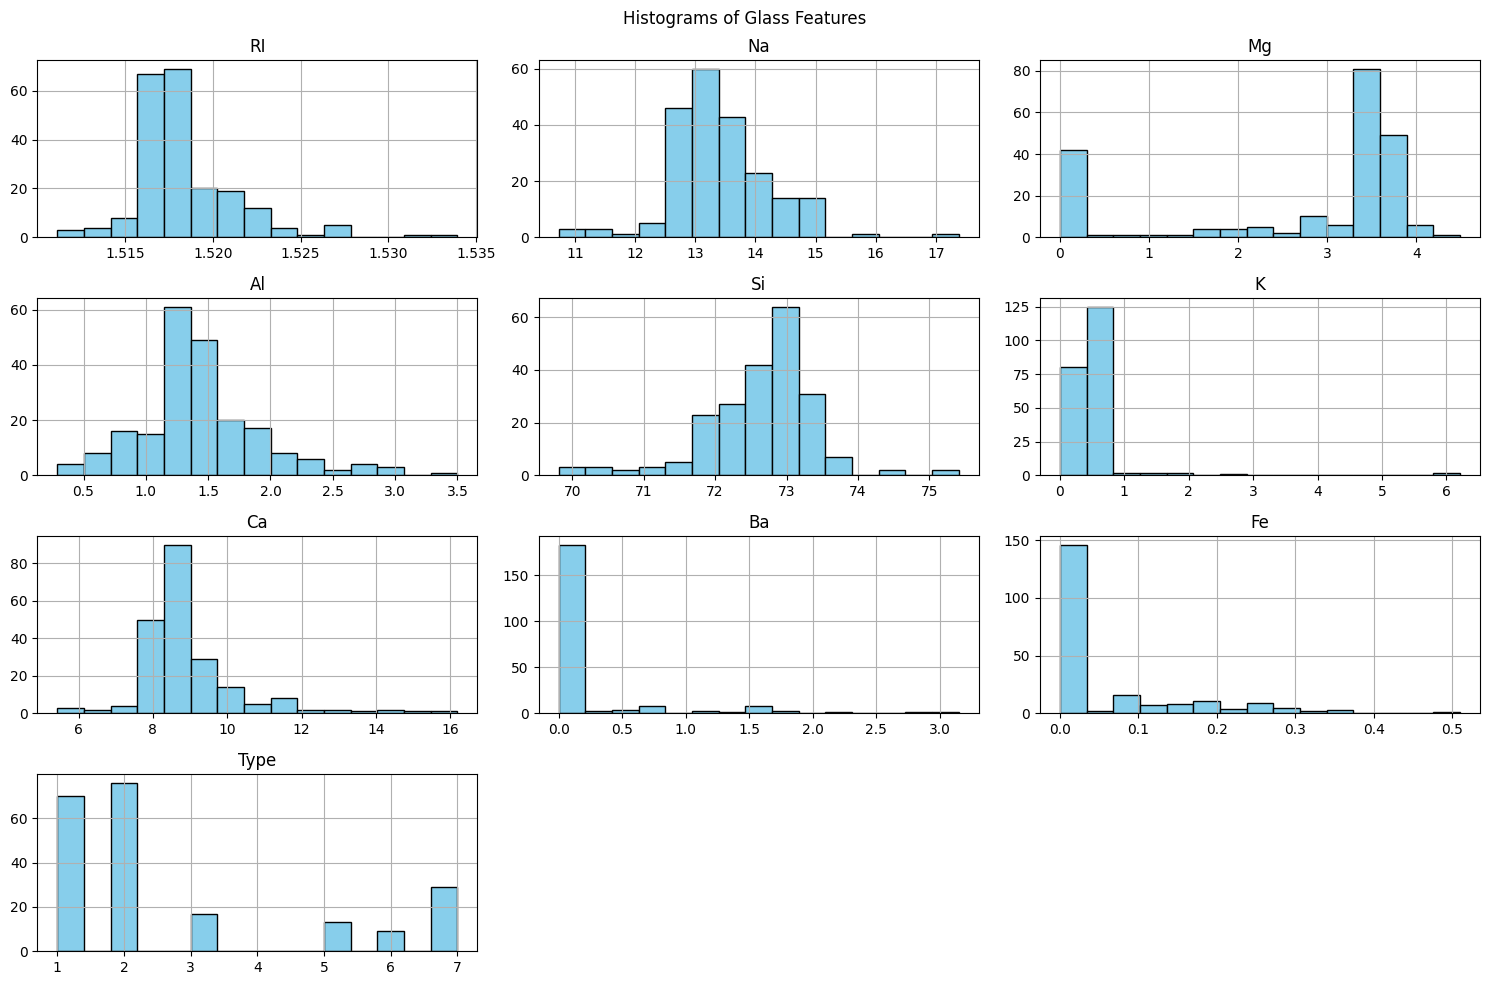

In [5]:

# 1. Histograms
df.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Glass Features")
plt.tight_layout()
plt.show()


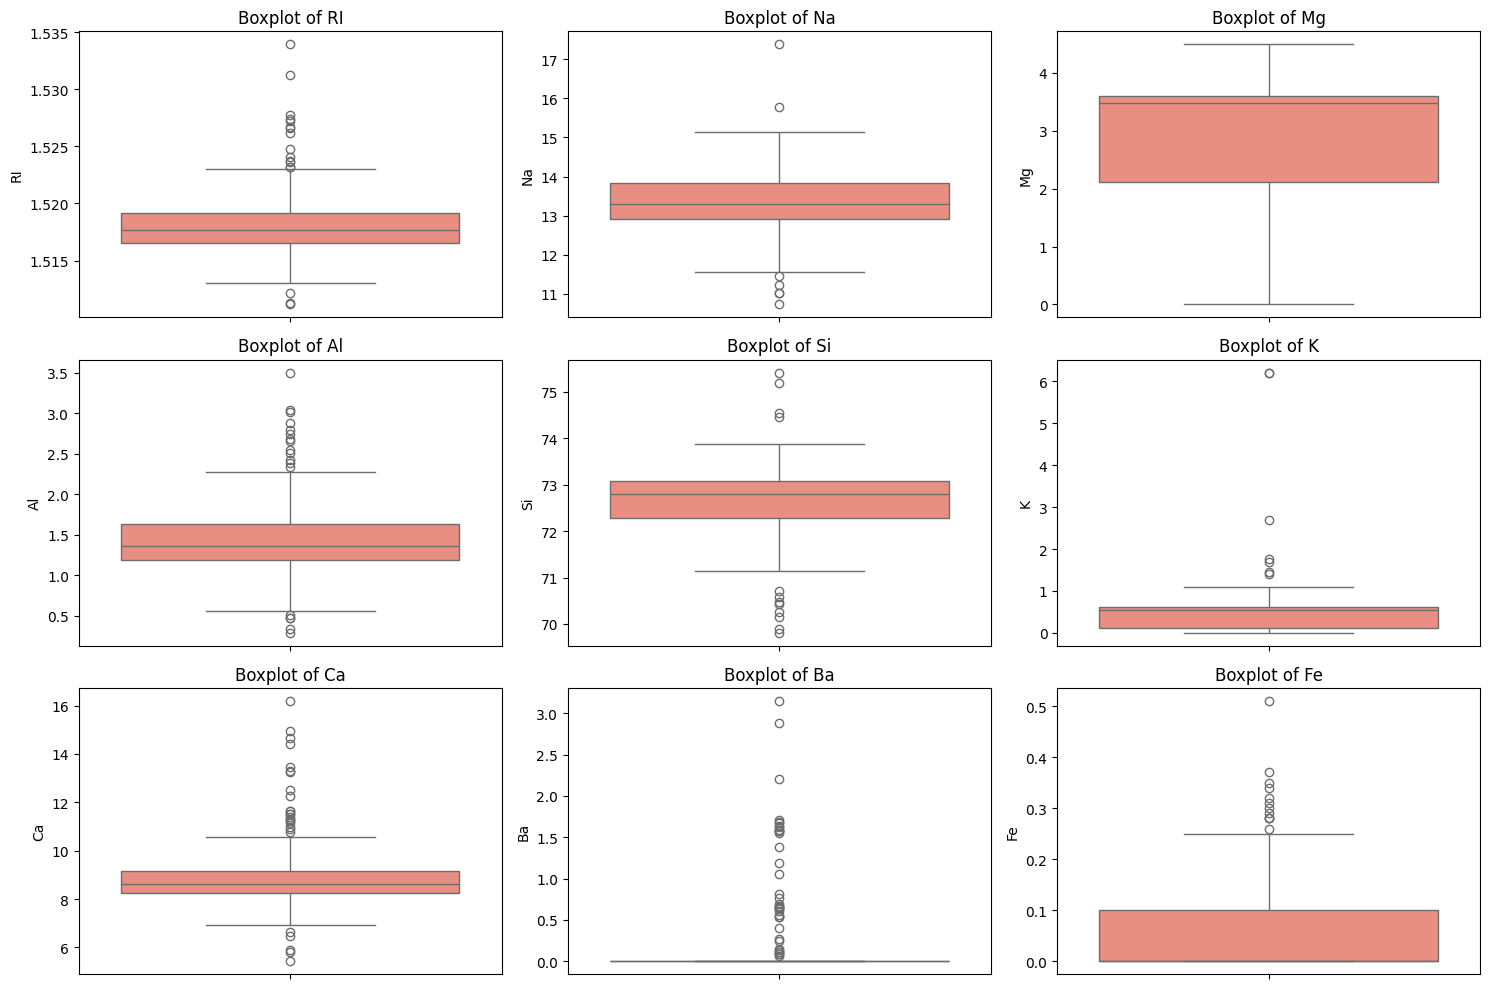

In [6]:

# 2. Boxplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):  # Exclude 'Type'
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column], color='salmon')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


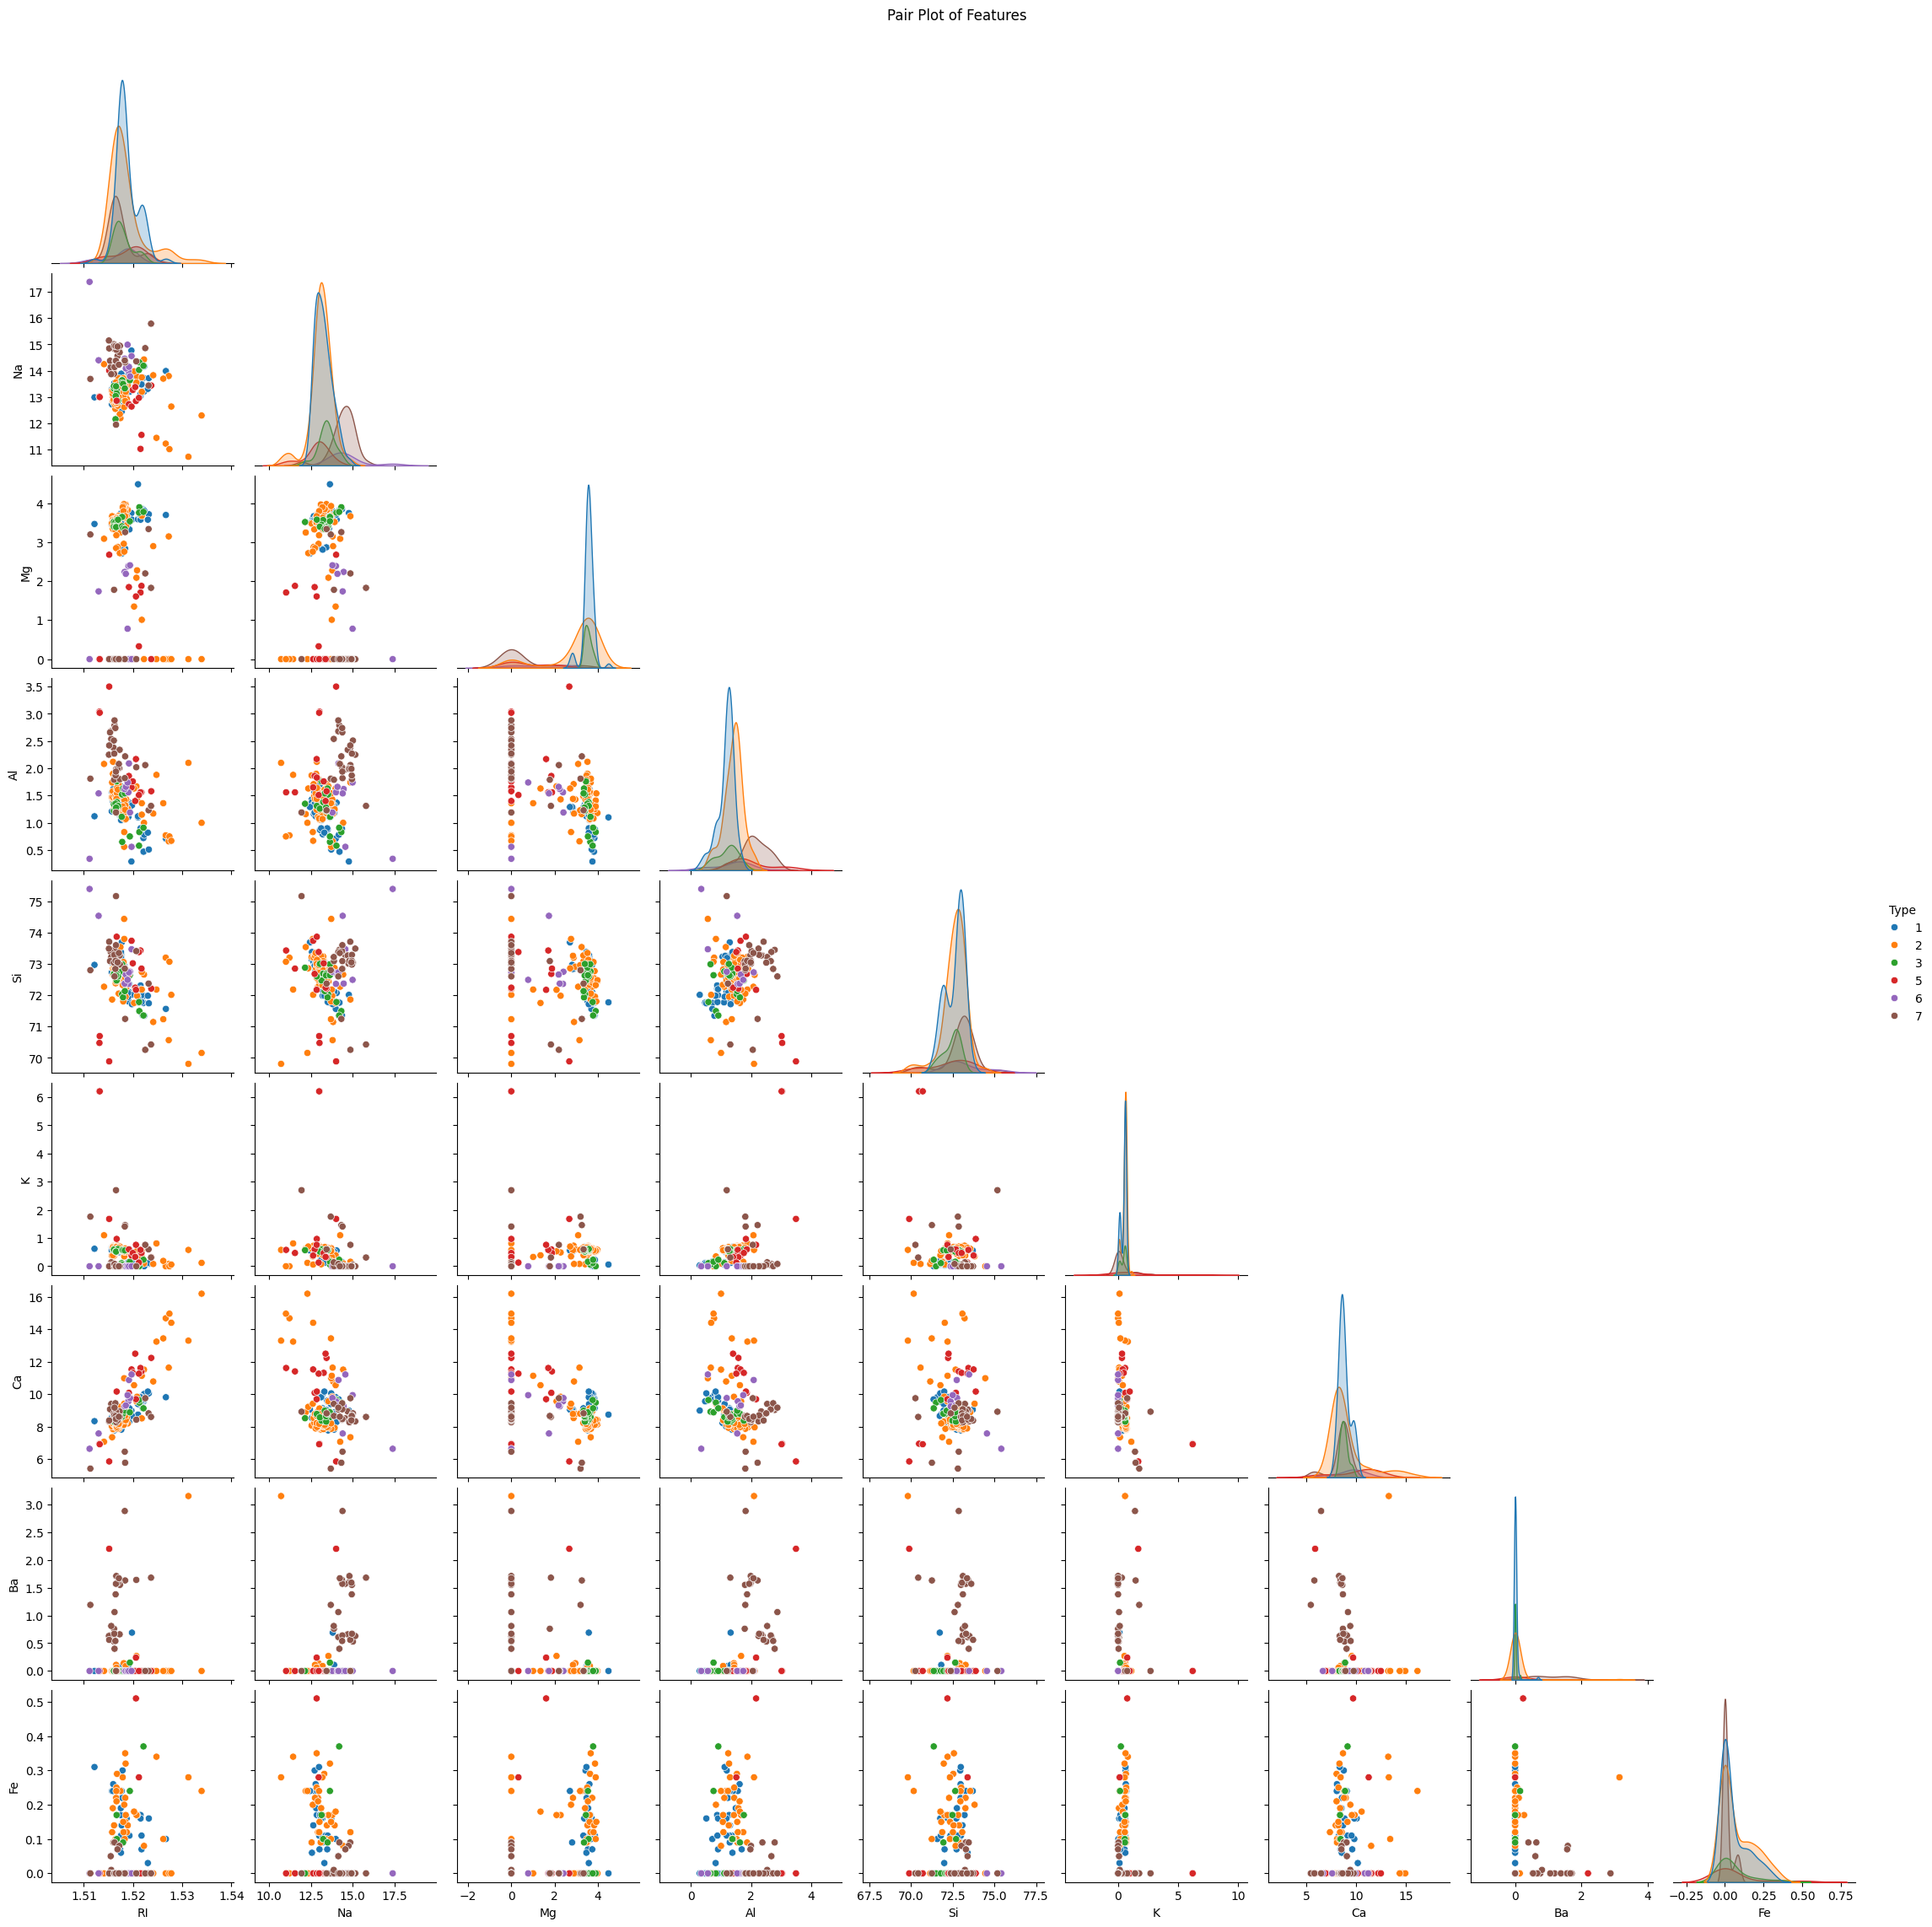

In [7]:

# 3. Pair Plot
sns.pairplot(df, hue="Type", palette="tab10", corner=True)
plt.suptitle("Pair Plot of Features", y=1.02)
plt.show()


In [8]:

# ================== STEP 3: Preprocessing ==================

# 1. No missing values, so nothing to impute
# 2. No categorical variables to encode
# 3. Feature Scaling
X = df.drop("Type", axis=1)
y = df["Type"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:


# ================== STEP 4: Random Forest ==================

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43

Accuracy: 0.8372093023255814


In [11]:

# ================== STEP 5: Bagging and Boosting ==================

# Bagging (Updated for scikit-learn ≥1.2)
bagging = BaggingClassifier(estimator=RandomForestClassifier(), random_state=42)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)
print("\nBagging Accuracy:", accuracy_score(y_test, y_pred_bag))






Bagging Accuracy: 0.8604651162790697


In [12]:
# Boosting (AdaBoost)
boosting = AdaBoostClassifier(random_state=42)
boosting.fit(X_train, y_train)
y_pred_boost = boosting.predict(X_test)
print("\nBoosting Accuracy:", accuracy_score(y_test, y_pred_boost))




Boosting Accuracy: 0.5348837209302325


In [13]:
# Optional: Compare all in a table
models = ['Random Forest', 'Bagging', 'Boosting']
accuracies = [
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_bag),
    accuracy_score(y_test, y_pred_boost)
]

results_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
print("\nModel Comparison:\n", results_df)


Model Comparison:
            Model  Accuracy
0  Random Forest  0.837209
1        Bagging  0.860465
2       Boosting  0.534884


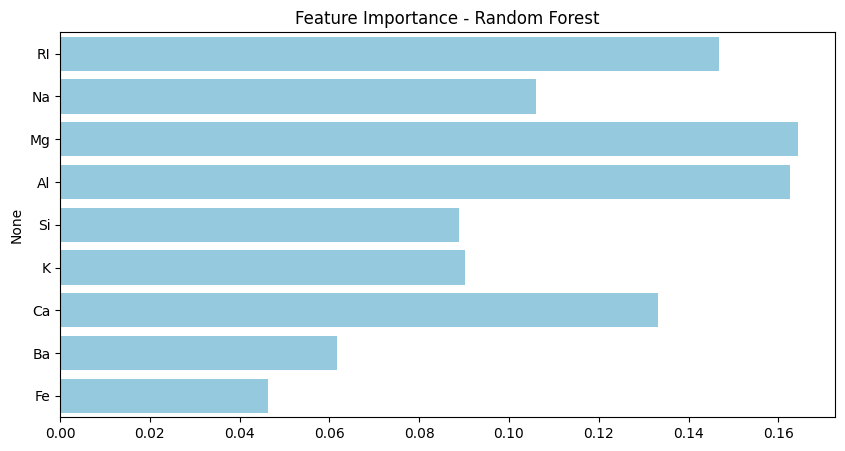

In [14]:
importances = rf.feature_importances_
feature_names = df.columns[:-1]
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names, color='skyblue')
plt.title("Feature Importance - Random Forest")
plt.show()


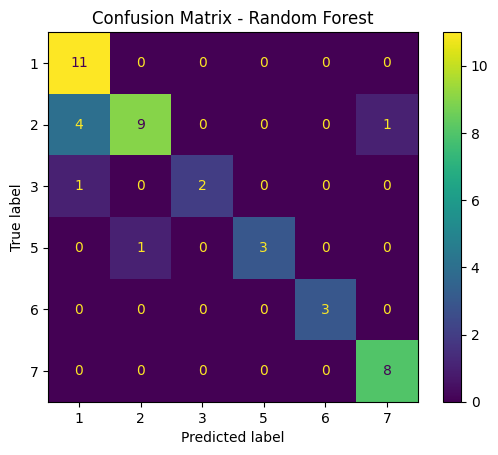

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [16]:
from imblearn.over_sampling import SMOTE

# Resample
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train-Test Split on resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train RF again
rf_balanced = RandomForestClassifier(random_state=42)
rf_balanced.fit(X_train, y_train)
y_pred_balanced = rf_balanced.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred_balanced))


              precision    recall  f1-score   support

           1       0.87      0.76      0.81        17
           2       0.85      0.89      0.87        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.92        92
   macro avg       0.93      0.93      0.93        92
weighted avg       0.93      0.92      0.92        92





##  Dataset Description

The dataset contains chemical analysis of glass samples used in forensic science.
It includes attributes such as:

- RI: Refractive Index
- Na: Sodium
- Mg: Magnesium
- Al: Aluminum
- Si: Silicon
- K: Potassium
- Ca: Calcium
- Ba: Barium
- Fe: Iron
- Type: Type of glass (target variable)

---

##  Exploratory Data Analysis (EDA)

Key observations:

- No missing values.
- Most features are normally distributed.
- Some features like `Ba` and `K` show skewness.

**Histograms, Box Plots, and Correlation Matrix** were created to visualize distributions and relationships.

---

##  Model Building

### 1. Random Forest
- Accuracy: `0.8372`
- Performs well with balanced bias-variance.

### 2. Bagging (with Random Forest as base estimator)
- Accuracy: `0.8604`
- Best performer in this project.
- Reduces variance effectively.

### 3. Boosting (XGBoost)
- Accuracy: `0.5348`
- Underperformed. Possibly due to class imbalance or overfitting.
- Could be improved with better hyperparameters or more preprocessing.

---




##  Conclusion

- **Bagging** performed the best in terms of accuracy.
- **Boosting** underperformed and may require further tuning.
- The model can be further improved by:
  - Feature scaling and transformation
  - Hyperparameter tuning
  - Handling class imbalance

---

##  Tools Used

- Python
- pandas, seaborn, matplotlib
- scikit-learn
- xgboost

---



